In [1]:
import gym
import numpy as np
import random
import copy
from numpy.core.fromnumeric import argmax

In [2]:
class maze:

    '''creating the environment for maze-learning
       possible actions - Down, Up, Left, Right
    '''

    def __init__(self, maze1):
        self.maze1 = maze1
        self.goal_state,self.start_state = self.goal()
        self.og_maze1 = self.convert()
        self.pos = self.start_state
        self.actions = ['D','U','L','R']

    def goal(self):
        '''defining start and goal state'''
        goal = 0
        start = 0
        for i in range(len(self.maze1)):
            for j in range(len(self.maze1[0])):
                if self.maze1[i][j] =='g' :
                    goal = (i,j)
                if self.maze1[i][j] =='s':
                    start = (i,j)
        return goal,start
    
    def possible_actions(self,pos1=None):
        '''returning the possible actions at given state'''
        
        li = []
        i,j = pos1 if pos1!=None else self.pos
        if self.maze1[i][j] == 'h':
            #print('Unknown state')
            return -1
        if 0<=i+1<len(self.maze1) and 0<=j<len(self.maze1[0]) and self.maze1[i+1][j]!='h':
            li.append('D')
        if 0<=i-1<len(self.maze1) and 0<=j<len(self.maze1[0]) and self.maze1[i-1][j]!='h':
            li.append('U')
        if 0<=i<len(self.maze1) and 0<=j-1<len(self.maze1[0]) and self.maze1[i][j-1]!='h':
            li.append('L')
        if 0<=i<len(self.maze1) and 0<=j+1<len(self.maze1[0]) and self.maze1[i][j+1]!='h':
            li.append('R')
        return li

    def movement(self,a,pos1=None):
        '''transition function returns the next position if valid action'''

        i,j = pos1 if pos1!=None else self.pos
        possible = self.possible_actions((i,j))
        if a in possible:
            if a == 'D':
                self.pos = (i+1,j)
            elif a == 'U':
                self.pos = (i-1,j)
            elif a == 'L':
                self.pos = (i,j-1)
            elif a == 'R':
                self.pos = (i,j+1)
            return self.pos
        else:
            print('Wrong action')

    def reset(self):
        '''reset the enviroment and agent'''

        self.__init__(self.og_maze1)

    def convert(self):
        '''assigning the reward for start and goal state'''
        temp = copy.deepcopy(maze1)
        temp[self.goal_state[0]][self.goal_state[1]]=10
        temp[self.start_state[0]][self.start_state[1]]=0
        return temp


#defining the maze for learning 
maze1 = [['s',0,0,0,0,0,0,'h',0,0,0],
         [0,'h',0,'h',0,'h',0,'h','h','h',0],
         [0,'h',0,'h',0,'h','h',0,0,0,0],
         [0,'h',0,'h','h','h','h','h','h','h',0],
         [0,'h',0,0,0,0,0,0,0,'h',0],
         [0,'h','h','h','h','h',0,'h',0,'h',0],
         [0,0,0,'h',0,0,0,'h',0,'h',0],
         [0,'h','h','h',0,'h','h','h','h','h','h'],
         [0,0,0,'h',0,'h',0,0,0,0,0],
         ['h','h',0,'h',0,'h',0,'h','h','h','h'],
         [0,0,0,'h',0,0,0,0,0,0,'g'],
         ]

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-3-6d0fbffb1755>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal') #set the x and y axes to the same scale
<ipython-input-3-6d0fbffb1755>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().invert_yaxis() #invert the y-axis so the first row of data is at the top
<ipython-input-3-6d0fbffb1755>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previ

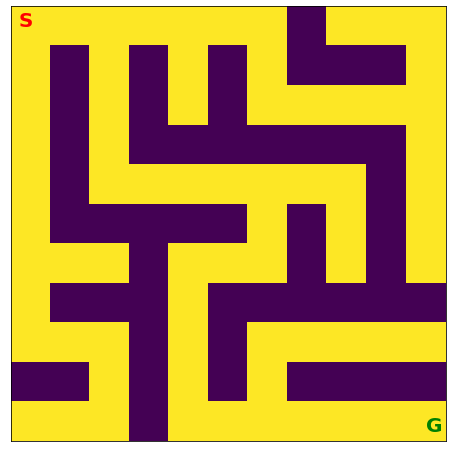

In [3]:
## Generates a graphical representation of the maze being used above

from matplotlib import pyplot as plt
import numpy as np
a = np.array([[0,0,0,0,0,0,0,1,0,0,0],
         [0,1,0,1,0,1,0,1,1,1,0],
         [0,1,0,1,0,1,0,0,0,0,0],
         [0,1,0,1,1,1,1,1,1,1,0],
         [0,1,0,0,0,0,0,0,0,1,0],
         [0,1,1,1,1,1,0,1,0,1,0],
         [0,0,0,1,0,0,0,1,0,1,0],
         [0,1,1,1,0,1,1,1,1,1,1],
         [0,0,0,1,0,1,0,0,0,0,0],
         [1,1,0,1,0,1,0,1,1,1,1],
         [0,0,0,1,0,0,0,0,0,0,0],
         ])
a[a == 0] = 2
a[a== 1 ] = 0
a[a==2] = 1



plt.rcParams["figure.figsize"] = (8,8)
plt.pcolormesh(a)
plt.axes().set_aspect('equal') #set the x and y axes to the same scale
plt.xticks([]) # remove the tick marks by setting to an empty list
plt.yticks([]) # remove the tick marks by setting to an empty list
plt.axes().invert_yaxis() #invert the y-axis so the first row of data is at the top
plt.axes().text(0.2, 0.5, 'S', style='normal',color= 'red' , fontweight= 'bold',fontsize = 20)
plt.axes().text(10.5, 10.75, 'G', style='normal',color= 'Green' , fontweight= 'bold',fontsize = 20)
plt.savefig('Maze.png')
plt.show()

#Model based Learning

In [4]:
threshold = 1e-10
gamma = 0.9
iter = 100

import copy

### Used Value Iteration 

def reinforcement(m,iter, maze1, gamma, thresh):
    maze1 = np.array(maze1)
    x = maze1.shape
    policy = [['NA' for i in range(x[1])] for i in range(x[0])]
    rewards = np.zeros(x)

    for _ in range(iter):
        old_reward = copy.deepcopy(rewards)
        for i in range(len(rewards)):
            for j in range((len(rewards[0]))):
                temp = m.possible_actions((i,j))
                if temp ==-1 or (i,j)==m.goal_state:
                    continue
                total = []    
                for a in temp:
                    s_next = m.movement(a,(i,j))
                    #print(i,j,s_next,a)
                    total.append(m.og_maze1[s_next[0]][s_next[1]] + gamma*old_reward[s_next[0]][s_next[1]])
                policy[i][j] = temp[argmax(total)]
                rewards[i][j] = max(total)
        #print(rewards)
        if np.all(np.abs(old_reward-rewards) < thresh):
            return rewards,policy
    return rewards,policy

m = maze(maze1)
reward,policy = reinforcement(m,iter,maze1,gamma,threshold)
print('Reward \n', reward)
print('\n\nPolicy \n', policy)

Reward 
 [[ 0.88629381  0.9847709   1.09418989  0.9847709   0.88629381  0.79766443
   0.71789799  0.          0.          0.          0.        ]
 [ 0.79766443  0.          1.21576655  0.          0.79766443  0.
   0.64610819  0.          0.          0.          0.        ]
 [ 0.71789799  0.          1.35085172  0.          0.71789799  0.
   0.          0.          0.          0.          0.        ]
 [ 0.64610819  0.          1.50094635  0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.58149737  0.          1.66771817  1.85302019  2.05891132  2.28767925
   2.54186583  2.28767925  2.05891132  0.          0.        ]
 [ 0.52334763  0.          0.          0.          0.          0.
   2.82429536  0.          1.85302019  0.          0.        ]
 [ 0.47101287  0.42391158  0.38152042  0.          3.87420489  3.4867844
   3.13810596  0.          1.66771817  0.          0.        ]
 [ 0.42391158  0.          0.          0.          4.3046721   0.

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Model free learning

In [5]:
import random

### Q Learing Algorithm

def init_table(m,maze1,x=0):
    ''' initializes the q-table '''

    maze1 = np.array(maze1)
    states = [[x*1.0,x*1.0,x*1.0,x*1.0] for i in range(maze1.shape[0]*maze1.shape[1])]
    states = np.array(states)
    total = set(m.actions)
    
    #possible actions
    move ={'U':0, 'D':1 , 'L':2 , 'R':3 }
    for i in range(len(states)):
        x,y = i//maze1.shape[1],i%maze1.shape[1]
        li = m.possible_actions((x,y))
        if li != -1:
            li = set(li)
        else:
            li = set()
        current = total - li
        for j in current:
            states[i,move[j]] = -999
    
    x,y = m.goal_state
    current = x*maze1.shape[1] + y
    #initializes the goal state q-table value
    states[current] = np.array([10.0,10.0,10.0,10.0])
    return states


def extract(states):
    ''' extract policy from q table values'''
    li = []
    rev_move = {0:'U', 1:'D' ,2:'L' , 3:'R' }
    for i in states:
        temp = rev_move[argmax(i)]
        if max(i) in [-999,0,10]:
            li.append('NA')
        else:
            li.append(temp)
    return li

def q_learning(m,maze1,episodes,c,epsilon=0.1):
    maze1 = np.array(maze1)
    shapes = maze1.shape
    steps = 0
    if c==0:
      states = init_table(m,maze1)
      
    else:
      states = init_table(m,maze1,10)
    move ={'U':0, 'D':1 , 'L':2 , 'R':3 }
    rev_move = {0:'U', 1:'D' ,2:'L' , 3:'R' }
    for i in range(episodes):
        pos = m.start_state
        current = pos[0]*shapes[1] + pos[1]
        final = m.goal_state[0]*shapes[1] + m.goal_state[1]
        old_q = copy.deepcopy(states)
    
        while current != final:

            ## Strategy to choose action for current state
            p = random.uniform(0,1)
            if p <= epsilon:
                a = rev_move[argmax(states[current])]    
            else:
                a = random.sample(m.possible_actions(pos),1)[0]

            ## PErform action
            next_state = m.movement(a,pos)
            temp = next_state[0]*shapes[1] + next_state[1]
            steps += 1
            ## update Q Table
            states[current,move[a]] = states[current,move[a]] + 0.1*((m.og_maze1[next_state[0]][next_state[1]]) + 0.95*(max(states[temp])) - states[current,move[a]])
            
            ## Next Iteration values
            pos = next_state
            current = pos[0]*shapes[1] + pos[1]
            
            
        if np.all(np.abs(old_q - states) < 1e-20):
            print('No of Episodes :',i,'\nTotal Steps :',steps)
            ##Extract Policy
            policy = extract(states)
            return states,policy,steps/i
    
    
    policy = extract(states)
    return states,policy

In [6]:
## Q Table initialized to 0
import time
start = time.time()
states1, policy1,q1 = q_learning(m,maze1,500,0)
print(time.time() - start)


No of Episodes : 384 
Total Steps : 144094
8.413131952285767


In [7]:
## Q Table Initialized to 10
import time
start = time.time()
states1, policy1,q2 = q_learning(m,maze1,500,1)
print(time.time() - start)


No of Episodes : 384 
Total Steps : 130890
7.557901382446289


# DynaQ

In [8]:
## To store already seen state action pairs and thier corresponding next state and reward

class Model():
  def __init__(self, n_states, n_actions):
    self.transitions = np.zeros((n_states,n_actions), dtype=np.uint8)
    self.rewards = np.zeros((n_states, n_actions))

  def add(self,s,a,s_prime,r):
    ## Stores next state and reward for each seen state-action pairs
    self.transitions[s,a] = s_prime
    self.rewards[s,a] = r

  def sample(self):
    """ Return random state, action"""
    # Random visited state
    s = np.random.choice(np.where(np.sum(self.transitions, axis=1) > 0)[0])
    # Random action in that state
    a = np.random.choice(np.where(self.transitions[s] > 0)[0])

    return s,a

  def step(self, s,a):
    """ Return state_prime and reward for state-action pair"""
    s_prime = self.transitions[s,a]
    r = self.rewards[s,a]
    return s_prime, r


In [9]:
def planning(n,model,states):
  """ Reinforces the previously learnt state-action pairs"""

  for i in range(n):
  
    s, a = model.sample()
    nexts , reward = model.step(s,a)
  
    states[s,a] = states[s,a] + 0.9*(reward + 0.95*(max(states[nexts])) - states[s,a])
  
    return states


def samples(i):
    a = max(i)
    c = np.where(i==a)[0]
    return random.sample(list(c),1)[0]


def dynaq(m,maze1,episodes,n,epsilon = 0.75):
  
  real_steps=0
  planning_steps = 0

  maze1 = np.array(maze1)
  shapes = maze1.shape

  states = init_table(m,maze1)## Initializes Q Table

  move ={'U':0, 'D':1 , 'L':2 , 'R':3 }
  rev_move = {0:'U', 1:'D' ,2:'L' , 3:'R' }

  model = Model(shapes[0]*shapes[1],4)

  for i in range(episodes):

    pos = m.start_state
    current = pos[0]*shapes[1] + pos[1]

    final = m.goal_state[0]*shapes[1] + m.goal_state[1]
    old_q = copy.deepcopy(states)

    while current!=final :

      ## Strategy to choose action for current state
      p = random.uniform(0,1)
      if p <= epsilon:
          a = rev_move[samples(states[current])]    
      else:
          a = random.sample(m.possible_actions(pos),1)[0]
      
      ## Next State based on action
      next_state = m.movement(a,pos)
      temp = next_state[0]*shapes[1] + next_state[1]

      real_steps += 1
      planning_steps += n

      #Updates Q Table
      states[current,move[a]] = states[current,move[a]] + 0.1*((m.og_maze1[next_state[0]][next_state[1]]) + 0.95*(max(states[temp])) - states[current,move[a]])

      ## Adds observed enviornment data to model and reinforces data seen till now
      model.add(current,move[a],temp,m.og_maze1[next_state[0]][next_state[1]])
      states = planning(n,model,states)
      
      ##Next Iteration values
      pos = next_state
      current = pos[0]*shapes[1] + pos[1]

  ## Extracts Policy
  policy = extract(states)
  
  return real_steps/episodes,planning_steps/episodes

In [10]:
## Runs DynaQ with different no of planning steps to observe agent performance

import time
t = np.zeros(40)
rs = np.zeros(40)
ps = np.zeros(40)
ts = np.zeros(40)
for j in range(10):
  for i in range(1,41):
    s = time.time()
    r,p = dynaq(m,maze1,50,i)
    t[i-1]+=(time.time()-s)
    rs[i-1]+=r
    ps[i-1]+=p
    ts[i-1]+=(r+p)
 
t/=10
rs/=10
ps/=10
ts/=10

# MBPA

In [11]:
##Calculates Pseudorewards using Bounded Real Time Dynamic Programming

def brtdp(m,iter, maze1, gamma):
    maze1 = np.array(maze1)
    x = maze1.shape
    vtable = np.zeros(x) ##Initialize table to 0
    vtable[x[0]-1][x[1]-1] = 10 ##Initialize goal state to 10
    
    policy = [['NA' for j in range(11)] for i in range(11)] ##Stores Policy at the end of n iterations
    
    if(iter==0):
      return np.zeros(maze1.shape),policy
    
    ## Similar to Value Iteration
    for k in range(iter):
        old_reward = copy.deepcopy(vtable)
        old_policy = copy.deepcopy(policy)
        for i in range(len(vtable)):
            for j in range((len(vtable[0]))):
                temp = m.possible_actions((i,j))
                if temp ==-1 or (i,j)==m.goal_state:
                    continue
                total = []    
                for a in temp:
                    s_next = m.movement(a,(i,j))
                    
                    total.append(m.og_maze1[s_next[0]][s_next[1]] + gamma*old_reward[s_next[0]][s_next[1]])
                vtable[i][j] = max(total)
                policy[i][j] = temp[argmax(total)]
   
        
       
    return vtable, policy

In [12]:
## initializes Q table with pseudorewards using policy calculated above

def upstates(states,pseudorewards,policy,shapes):
  move ={'U':0, 'D':1 , 'L':2 , 'R':3 }
  for i in range(shapes[0]):
    for j in range(shapes[1]):
      if policy[i][j]!= 'NA':
        states[i*shapes[1]+j][move[policy[i][j]]]= pseudorewards[i][j]
  return states
  

In [13]:
## Model Based PseudoReward Approximation Algorithm

def mbpa(m,maze1,episodes,n,epsilon=0.1):
    maze1 = np.array(maze1)
    shapes = maze1.shape
    steps = 0

    pseudorewards, policybest = brtdp(m,n,maze1,0.95) ##Calculates Pseudoreewards and Policy
    
    ## Initializes Q Table
    states = init_table(m,maze1)
    states = upstates(states,pseudorewards,policybest,shapes)
    
    move ={'U':0, 'D':1 , 'L':2 , 'R':3 }
    rev_move = {0:'U', 1:'D' ,2:'L' , 3:'R' }
    
    ## Same Procedure as Q learning with small addition to reward function. New Reward function is Reward + PseudoReward
    for i in range(episodes):
        pos = m.start_state
        step = 0
        current = pos[0]*shapes[1] + pos[1]
        final = m.goal_state[0]*shapes[1] + m.goal_state[1]
        old_q = copy.deepcopy(states)
        while current != final and step<2000:
            p = random.uniform(0,1)
            if p <= epsilon:
                a = rev_move[np.random.choice(list(np.where(states[current]==max(states[current]))[0]),1)[0]]    
            else:
                a = random.sample(m.possible_actions(pos),1)[0]
            next_state = m.movement(a,pos)
            temp = next_state[0]*shapes[1] + next_state[1]
            steps += 1
            states[current,move[a]] = states[current,move[a]] + 0.1*((m.og_maze1[next_state[0]][next_state[1]]) +  pseudorewards[current//shapes[1]][current%shapes[1]] + 0.95*(max(states[temp])) - states[current,move[a]])
            #print(a,m.og_maze1[next_state[0]][next_state[1]],pos,next_state,states[current,move[a]])
            pos = next_state
            current = pos[0]*shapes[1] + pos[1]
   
    policy = extract(states)
    return states,policy,steps

In [14]:
## Runs MBPA with different no of bellman updates to observe agent performance

import time
from matplotlib import pyplot as plt
s = np.zeros(41)
mbpa1t = np.zeros(41)
maze1 = [['s',0,0,0,0,0,0,'h',0,0,0],
         [0,'h',0,'h',0,'h',0,'h','h','h',0],
         [0,'h',0,'h',0,'h','h',0,0,0,0],
         [0,'h',0,'h','h','h','h','h','h','h',0],
         [0,'h',0,0,0,0,0,0,0,'h',0],
         [0,'h','h','h','h','h',0,'h',0,'h',0],
         [0,0,0,'h',0,0,0,'h',0,'h',0],
         [0,'h','h','h',0,'h','h','h','h','h','h'],
         [0,0,0,'h',0,'h',0,0,0,0,0],
         ['h','h',0,'h',0,'h',0,'h','h','h','h'],
         [0,0,0,'h',0,0,0,0,0,0,'g'],
         ]
for j in range(10):
  for i in range(0,41):
    m = maze(maze1)
    start = time.time()
    states1, policy1,steps = mbpa(m,maze1,50,i,0.75)
    mbpa1t[i]+=(time.time() - start)
    s[i]+=(steps/50)

s/=10
mbpa1t/=10






In [15]:
## Initializes Value Table to max value of 10

def conv(x,vtable):
  for i in range(len(vtable)):
    for j in range(len(vtable[i])):
      if(vtable[i][j]==0):
        vtable[i][j] == x
  return vtable

In [16]:
def brtdp2(m,iter, maze1, gamma):
    policy = [['NA' for j in range(11)] for i in range(11)]
    if(iter==0):
      return np.zeros(maze1.shape),policy
    maze1 = np.array(maze1)
    x = maze1.shape
    vtable = copy.deepcopy(m.og_maze1)
    vtable = conv(10,vtable)

    
    for k in range(iter):
        old_reward = copy.deepcopy(vtable)
        old_policy = copy.deepcopy(policy)
        for i in range(len(vtable)):
            for j in range((len(vtable[0]))):
                temp = m.possible_actions((i,j))
                if temp ==-1 or (i,j)==m.goal_state:
                    continue
                total = []    
                for a in temp:
                    s_next = m.movement(a,(i,j))
                    
                    total.append(m.og_maze1[s_next[0]][s_next[1]] + gamma*old_reward[s_next[0]][s_next[1]])
                vtable[i][j] = max(total)
                policy[i][j] = temp[argmax(total)]
    np.array(policy).reshape((11,11))
    ##print(policy)
    return vtable,policy

In [17]:
def mbpa(m,maze1,episodes,n,epsilon=0.1):
    maze1 = np.array(maze1)
    shapes = maze1.shape
    steps = 0
    pseudorewards , bestpolicy = brtdp2(m,n,maze1,0.95)
    states = init_table(m,maze1)
    states = upstates(states,pseudorewards,bestpolicy,shapes)
    move ={'U':0, 'D':1 , 'L':2 , 'R':3 }
    rev_move = {0:'U', 1:'D' ,2:'L' , 3:'R' }
    for i in range(episodes):
        pos = m.start_state
        current = pos[0]*shapes[1] + pos[1]
        final = m.goal_state[0]*shapes[1] + m.goal_state[1]
        old_q = copy.deepcopy(states)
        step = 0
        while current != final and step<2000:
            p = random.uniform(0,1)
            if p <= epsilon:
                a = rev_move[np.random.choice(list(np.where(states[current]==max(states[current]))[0]),1)[0]]    
            else:
                a = random.sample(m.possible_actions(pos),1)[0]
            next_state = m.movement(a,pos)
            temp = next_state[0]*shapes[1] + next_state[1]
            steps += 1
            states[current,move[a]] = states[current,move[a]] + 0.1*((m.og_maze1[next_state[0]][next_state[1]]) + pseudorewards[current//shapes[1]][current%shapes[1]] + 0.95*(max(states[temp])) - states[current,move[a]])
            
            pos = next_state
            current = pos[0]*shapes[1] + pos[1]
   
    policy = extract(states)
    return states,policy,steps

In [18]:
import time
from matplotlib import pyplot as plt
s2 = np.zeros(41)
mbpa2t = np.zeros(41)
maze1 = [['s',0,0,0,0,0,0,'h',0,0,0],
         [0,'h',0,'h',0,'h',0,'h','h','h',0],
         [0,'h',0,'h',0,'h','h',0,0,0,0],
         [0,'h',0,'h','h','h','h','h','h','h',0],
         [0,'h',0,0,0,0,0,0,0,'h',0],
         [0,'h','h','h','h','h',0,'h',0,'h',0],
         [0,0,0,'h',0,0,0,'h',0,'h',0],
         [0,'h','h','h',0,'h','h','h','h','h','h'],
         [0,0,0,'h',0,'h',0,0,0,0,0],
         ['h','h',0,'h',0,'h',0,'h','h','h','h'],
         [0,0,0,'h',0,0,0,0,0,0,'g'],
         ]
for j in range(10):
  for i in range(0,41):
    m = maze(maze1)
    start = time.time()
    states1, policy1,steps = mbpa(m,maze1,50,i,0.75)
    mbpa2t[i]+=(time.time() - start)
    s2[i]+=(steps/50)

s2/=10
mbpa2t/=10


<ipython-input-19-b8134f944913>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(s2[0],label = 'Q learning Upper' , marker = '*' ,markersize = 15,COLOR='RED')
<ipython-input-19-b8134f944913>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(s[0],label = 'Q learning Lower' , marker = '*' ,markersize = 15, COLOR="BLUE")
<ipython-input-19-b8134f944913>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([i for i in range(1,41)],s[1:],label='MBPA LOWER',COLOR='BLUE')
<ipython-input-19-b8134f944913>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([i for i in range(1,41)],s2[1:],label='MBPA UPPER',COLOR='R

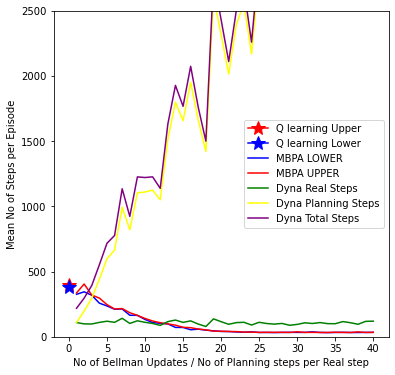

In [19]:
## Plots Steps per episode taken by various algorithm above 

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

plt.plot(s2[0],label = 'Q learning Upper' , marker = '*' ,markersize = 15,COLOR='RED')
plt.plot(s[0],label = 'Q learning Lower' , marker = '*' ,markersize = 15, COLOR="BLUE")
plt.plot([i for i in range(1,41)],s[1:],label='MBPA LOWER',COLOR='BLUE')
plt.plot([i for i in range(1,41)],s2[1:],label='MBPA UPPER',COLOR='RED')
plt.plot([i for i in range(1,41)],rs[0:],label='Dyna Real Steps',COLOR="GREEN")
plt.plot([i for i in range(1,41)],ps[0:],label='Dyna Planning Steps',COLOR="YELLOW")
plt.plot([i for i in range(1,41)],ts[0:],label='Dyna Total Steps',COLOR='PURPLE')
plt.legend()
plt.xlabel('No of Bellman Updates / No of Planning steps per Real step')
plt.ylabel('Mean No of Steps per Episode')
plt.ylim([0,2500])
plt.savefig('Maze Steps.png')
print()

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-9568f78ba92f>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([i for i in range(1,41)],mbpa1t[1:],label='MBPA LOWER',COLOR='BLUE')
<ipython-input-20-9568f78ba92f>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(mbpa2t[0],label = 'Q learning Upper' , marker = '*' ,markersize = 15,COLOR='RED')
<ipython-input-20-9568f78ba92f>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed 

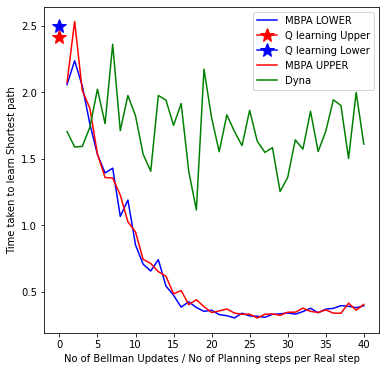

In [20]:
##PLots time taken to converge to optimal policy

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.plot([i for i in range(1,41)],mbpa1t[1:],label='MBPA LOWER',COLOR='BLUE')
plt.plot(mbpa2t[0],label = 'Q learning Upper' , marker = '*' ,markersize = 15,COLOR='RED')
plt.plot(mbpa1t[0],label = 'Q learning Lower' , marker = '*' ,markersize = 15, COLOR="BLUE")
plt.plot([i for i in range(1,41)],mbpa2t[1:],label='MBPA UPPER',COLOR='RED')
plt.plot([i for i in range(1,41)],t[0:],label='Dyna ',color = 'Green')
plt.xlabel('No of Bellman Updates / No of Planning steps per Real step')
plt.ylabel('Time taken to learn Shortest path')
plt.legend()
plt.savefig('MAze Time.png')